<a href="https://colab.research.google.com/github/nxxk23/AI-Engineer/blob/main/price/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **analyse**


In [17]:
import pandas as pd

In [18]:
diag = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/RYH_DrNote_202412.csv', encoding='cp874')
diag.head()

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname
0,608768,O,SKIN ห้องผิวหนัง,เกลื้อนที่หลัง,มีผื่นขาวที่หลัง ต้นแขนใหม่ คันเวลาเหงื่อออก,เกลื้อน(Pityriasis versicolor),NaN,NaN,hypopigmented macule with fine scale at back a...,[B36.0] Pityriasis versicolor,DRF0096,พญ. ขวัญเสด็จ วังศิริไพศาล
1,886211,O,CheckUp Center ตรวจสุขภาพ,ตรวจสุขภาพบริษัท,NaN,การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,NaN,"CBC, UA (Urine Analysis), FBS, BUN, Creatinine...",NaN,[Z00] General examination and investigation of...,DRF0235,พญ. ณภัทร เทพหัสดิน ณ อยุธยา
2,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์
3,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์
4,894455,O,PED ห้องเด็ก,วัคซีน ไม่เอาสมุดวัคซีนมา,ป5 รร อนุบาลนครหาดใหญ่ เรียนดี nutrition ดี \r...,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,advice side effect of vaccine,NaN,active \r\nheart no murmur \r\nlung clear\r\na...,[Z25.1] Need for immunization against influenza,DRF0916,พญ. กมรพรรณ แสงอรุณ


In [19]:
income = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/RYH_PatIncom_202412.csv', encoding='cp874')
income.head()

,ID,IncomeCode,IncomeCode.1,Amt
0,1125436,76,1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก,100.0
1,1127453,92,1.1.14 (1) ค่าบริการชุดเหมาจ่าย,340.0
2,1132595,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,1200.0
3,1133791,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,336.0
4,1133261,140,2.3 ค่าอาหารผู้ป่วย,1400.0


## duplicate
```
Removing all IDs with duplicates (keep only IDs that appear once)
```

In [20]:
# นับจำนวนแถวต่อคู่ (ID, IncomeCode)
dup_counts = income.groupby(['ID', 'IncomeCode']).size().reset_index(name='count')

# กรองเฉพาะคู่ที่มีจำนวนซ้ำ > 1 (หมายถึงคู่ (ID,IncomeCode) นี้มีมากกว่า 1 แถว)
dups = dup_counts[dup_counts['count'] > 1]

# จำนวนคู่ (ID,IncomeCode) ที่ซ้ำกันมากกว่า 1 ครั้ง
num_duplicate_pairs = len(dups)
print(f"จำนวนคู่ (id, income_code) ที่ซ้ำมากกว่า 1 ครั้ง: {num_duplicate_pairs}")

จำนวนคู่ (id, income_code) ที่ซ้ำมากกว่า 1 ครั้ง: 0


In [21]:
counts = diag['ID'].value_counts()
unique_ids = counts[counts == 1].index  # IDs appearing exactly once
# print(len(unique_ids))
diag1 = diag[diag['ID'].isin(unique_ids)]
print(diag.shape)
print(diag1['ID'].nunique())  # Should give number of IDs appearing exactly once
diag1.head()

(11992, 12)
10610


,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname
0,608768,O,SKIN ห้องผิวหนัง,เกลื้อนที่หลัง,มีผื่นขาวที่หลัง ต้นแขนใหม่ คันเวลาเหงื่อออก,เกลื้อน(Pityriasis versicolor),NaN,NaN,hypopigmented macule with fine scale at back a...,[B36.0] Pityriasis versicolor,DRF0096,พญ. ขวัญเสด็จ วังศิริไพศาล
1,886211,O,CheckUp Center ตรวจสุขภาพ,ตรวจสุขภาพบริษัท,NaN,การตรวจทั่วไปและสืบค้นโรคในบุคคลที่ไม่มีอาการผ...,NaN,"CBC, UA (Urine Analysis), FBS, BUN, Creatinine...",NaN,[Z00] General examination and investigation of...,DRF0235,พญ. ณภัทร เทพหัสดิน ณ อยุธยา
2,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์
3,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์
4,894455,O,PED ห้องเด็ก,วัคซีน ไม่เอาสมุดวัคซีนมา,ป5 รร อนุบาลนครหาดใหญ่ เรียนดี nutrition ดี \r...,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,advice side effect of vaccine,NaN,active \r\nheart no murmur \r\nlung clear\r\na...,[Z25.1] Need for immunization against influenza,DRF0916,พญ. กมรพรรณ แสงอรุณ


In [22]:
counts.head(1)
# diag[diag['ID']==1132725]

,count
ID,
1132725,5


In [24]:
merged_df = diag1.merge(income, on='ID', how='inner')  # รวมเฉพาะ ID ที่เจอทั้งสองตาราง
merged_df.to_csv('/content/drive/MyDrive/AIEngineer/price/merged.csv', index=False)

In [26]:
merged_df.head()

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt
0,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,650.0
1,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,92,1.1.14 (1) ค่าบริการชุดเหมาจ่าย,85.0
2,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,100.0
3,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,100.0
4,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,650.0


In [27]:
# สมมติ merged_df คือ dataframe ที่ได้จากการ merge
grouped = merged_df.groupby('ID').agg({
    'OcmPatTyp': 'first',        # เอาค่าแรกของแต่ละกลุ่ม (หรือใช้วิธีอื่นตามต้องการ)
    'NurseStation': 'first',
    'CC': 'first',
    'Pi': 'first',
    'Diag': 'first',
    'Plan': 'first',
    'Inv': 'first',
    'PEtext': 'first',
    'ICD10': 'first',
    'PhyDtrCod': 'first',
    'docname': 'first',
    'IncomeCode': lambda x: list(x),       # รวม IncomeCode เป็น list
    'IncomeCode.1': lambda x: list(x),     # รวม IncomeCode.1 เป็น list
    'Amt': lambda x: list(x)                # รวม Amt เป็น list
}).reset_index()
print(grouped.shape)

(9908, 15)


In [28]:
def sort_income_group(df):
    combined = list(zip(df['IncomeCode'], df['IncomeCode.1'], df['Amt']))
    combined.sort()  # เรียงตาม IncomeCode
    income_code, income_desc, amt = zip(*combined)
    return list(income_code), list(income_desc), list(amt)

# Apply groupby with stable sort
grouped1 = merged_df.groupby('ID').apply(lambda group: pd.Series({
    'OcmPatTyp': group['OcmPatTyp'].iloc[0],
    'NurseStation': group['NurseStation'].iloc[0],
    'CC': group['CC'].iloc[0],
    'Pi': group['Pi'].iloc[0],
    'Diag': group['Diag'].iloc[0],
    'Plan': group['Plan'].iloc[0],
    'Inv': group['Inv'].iloc[0],
    'PEtext': group['PEtext'].iloc[0],
    'ICD10': group['ICD10'].iloc[0],
    'PhyDtrCod': group['PhyDtrCod'].iloc[0],
    'docname': group['docname'].iloc[0],
    'IncomeCode': sort_income_group(group)[0],
    'IncomeCode.1': sort_income_group(group)[1],
    'Amt': sort_income_group(group)[2],
    'TotalAmt': group['Amt'].sum()
})).reset_index()
print(grouped1.shape)

(9908, 16)


<ipython-input-28-79647b12184c>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped1 = merged_df.groupby('ID').apply(lambda group: pd.Series({


In [29]:
grouped1.head()

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt,TotalAmt
0,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,"[6, 92, 104]","[1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.14 (1) ค่าบริก...","[650.0, 85.0, 100.0]",835.0
1,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,"[6, 92, 104]","[1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.14 (1) ค่าบริก...","[650.0, 85.0, 100.0]",835.0
2,894455,O,PED ห้องเด็ก,วัคซีน ไม่เอาสมุดวัคซีนมา,ป5 รร อนุบาลนครหาดใหญ่ เรียนดี nutrition ดี \r...,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,advice side effect of vaccine,NaN,active \r\nheart no murmur \r\nlung clear\r\na...,[Z25.1] Need for immunization against influenza,DRF0916,พญ. กมรพรรณ แสงอรุณ,"[6, 92, 104]","[1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.14 (1) ค่าบริก...","[650.0, 85.0, 100.0]",835.0
3,897083,O,PED ห้องเด็ก,นัดรับวัคซีนไข้หวัดใหญ่,มารับวัคซีน ไอเล็กน้อย ไม่มีไข้ \r\n,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,influenza vaccine\r\nyearly,NaN,"General: active, Chest: clear, Heart: normal S...",[Z25.1] Need for immunization against influenza,DRP1353,พญ. ปิยนุช ทองเสมอ,"[6, 92, 104]","[1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.14 (1) ค่าบริก...","[650.0, 85.0, 100.0]",835.0
4,899666,O,PED ห้องเด็ก,มารับวัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,นัด 1 ปี,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,"[6, 92, 104]","[1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.14 (1) ค่าบริก...","[650.0, 85.0, 100.0]",835.0


In [31]:
print(income['IncomeCode'].nunique())
print(grouped1['ICD10'].nunique())
print(grouped1['Diag'].nunique())
print(grouped1['ID'].nunique())
print(grouped1.shape)

72
1182
1382
9908
(9908, 16)


In [33]:
# grouped['TotalAmt'] = grouped['Amt'].apply(lambda x: sum(x))
grouped1.to_csv('/content/drive/MyDrive/AIEngineer/price/grouped.csv', index=False)

## **diag and icd10**
```
case wrong ICD10
```

In [32]:
grouped1.loc[[2637,2891,240]]

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt,TotalAmt
2637,1130692,O,OPD ทั่วไป,นัดติดตามอาการ,Case Late onset SLE DM \r\n\r\nCriteria\r\n-...,ลูปัส อีริทิมาโตซัส ทั่วร่าง(Systemic lupus er...,- ปฏิเสธ admit ที่นี้ แต่ยอมไปนอน รพ.ใกล้บ้าน\...,K (Potassium),"GA : fatique\r\nHEENT : dry lip, mild pale, no...",[M32] Systemic lupus erythematosus,DRF1223,พญ. นันทมนต์ วงศ์หิรัญเดชา,"[6, 19, 76, 94, 104]","[1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.4 (1) ค่าตรวจว...","[3104.0, 1540.0, 100.0, 100.0, 900.0]",5744.0
2891,1131270,O,OPD ทั่วไป,นัดติดตามอาการ,Case Late onset SLE \r\n DM \r\n\r\n...,ลูปัส อีริทิมาโตซัส ทั่วร่าง ไม่ระบุรายละเอียด...,Tap off pred\r\nRestart aza,CBC,NaN,"[M32.9] Systemic lupus erythematosus, unspecified",DRP1163,นพ. ณัฐพงศ์ สุนันทเมธี,"[6, 19, 76, 94, 104]","[1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.4 (1) ค่าตรวจว...","[7988.0, 320.0, 100.0, 100.0, 500.0]",9008.0
240,1107610,I,ER ห้องฉุกเฉิน,summary d/c,Case 74 YOF\r\nU/D \r\n@Undifferentiated conn...,ลูปัส อีริทิมาโตซัส ทั่วร่าง ไม่ระบุรายละเอียด...,NaN,"UA (Urine Analysis), Covid Ag/Influenza A/B, H...",NaN,"[R50.9] Fever, unspecified",DRF1223,พญ. นันทมนต์ วงศ์หิรัญเดชา,"[4, 7, 13, 16, 17, 19, 20, 23, 27, 28, 29, 30,...","[1.1.1 (1) ค่ายาผู้ป่วยใน, 1.1.1 (4) ค่าน้ำเกล...","[585515.0, 47900.0, 104575.0, 1540.0, 23550.0,...",1550795.0


**LLM check**

```
grouped[['Diag','ICD10']]
```



In [23]:
# import os
# import json
# import requests
# import pandas as pd
# from tqdm import tqdm
# from concurrent.futures import ThreadPoolExecutor, as_completed

# # === ENVIRONMENT VARIABLES ===
# LLM_API_KEY = "Basic bWFuYWdlYWkyMDI0Ok1hbmFnZUFJQDIwMjQ="
# LLM_API_URL = "https://ai-api.manageai.co.th/llm-model-02/generate"
# LLM_AUTH_USER = "manageai2024"
# LLM_AUTH_PASS = "ManageAI@2024"
# ICD10_API_URL = "http://quanta3.manageai.co.th:6534/icd10_search"

# # === LLM PARAMETERS ===
# model_param = {
#     "best_of": 1,
#     "frequency_penalty": 1.1,
#     "max_new_tokens": 100,
#     "repetition_penalty": 1.1,
#     "temperature": 0.1,
#     "top_k": 10,
#     "top_n_tokens": 5,
#     "top_p": 0.95,
#     "stop": ["assistant"]
# }

# # === Function to call the LLM ===
# def generate_response(prompt):
#     headers = {"Content-Type": "application/json"}
#     data = json.dumps({"inputs": prompt, "parameters": model_param})
#     try:
#         response = requests.post(LLM_API_URL, data=data, headers=headers, auth=(LLM_AUTH_USER, LLM_AUTH_PASS), timeout=15)
#         if response.status_code == 200:
#             response_json = response.json()
#             if "generated_text" in response_json:
#                 return response_json["generated_text"].strip()
#     except Exception as e:
#         return f"ERROR: {e}"
#     return "ERROR"

# # === Function to generate prompt ===
# def check_diag_icd10_relation(diag, icd10):
#     input_text = f"Diag: {diag}\nICD10: {icd10}"
#     prompt = f"""
# You are a medical coding expert. Your task is to check whether the diagnosis (Diag) and the ICD10 code provided are related or consistent.

# Input:
# {input_text}

# Instruction:
# - If they are related, respond only with: RELATED
# - If they are not related, respond only with: CONFLICT
# Do not provide any explanation.
# """
#     return generate_response(prompt)

# # === Function to fetch ICD10 from external API ===
# def fetch_correct_icd10(diag):
#     try:
#         response = requests.post(
#             ICD10_API_URL,
#             headers={"Content-Type": "application/json"},
#             data=json.dumps({"input_text": diag}),
#             timeout=10
#         )
#         if response.status_code == 200:
#             result = response.json()
#             if "ICD10" in result and result["ICD10"]:
#                 best = result["ICD10"][0]["source"]
#                 return f"[{best['ICD-10 Code']}] {best['Descriptions (EN)']}"
#     except Exception as e:
#         return None
#     return None

# # === Process single row ===
# def process_row(index, row):
#     diag = row["Diag"]
#     icd10 = row["ICD10"]
#     result = check_diag_icd10_relation(diag, icd10)
#     if result.upper() == "CONFLICT":
#         corrected = fetch_correct_icd10(diag)
#         return index, corrected if corrected else icd10
#     else:
#         return index, icd10

# # === Parallel processing ===
# def process_data_parallel(grouped, max_workers=10):
#     results = [None] * len(grouped)
#     with ThreadPoolExecutor(max_workers=max_workers) as executor:
#         future_to_index = {
#             executor.submit(process_row, idx, row): idx for idx, row in grouped.iterrows()
#         }
#         for future in tqdm(as_completed(future_to_index), total=len(grouped)):
#             idx, corrected_icd10 = future.result()
#             results[idx] = corrected_icd10
#     grouped["Corrected_ICD10"] = results
#     return grouped

# === Run the processing on your existing `grouped` DataFrame ===
# corrected_grouped = process_data_parallel(grouped)

In [28]:
# grouped[['Diag', 'ICD10', 'Corrected_ICD10']]

,Diag,ICD10,Corrected_ICD10
0,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,[Z25.1] Need for immunization against influenza,[Z25.1] Need for immunization against influenza
1,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,[Z25.1] Need for immunization against influenza,[Z25.1] Need for immunization against influenza
2,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,[Z25.1] Need for immunization against influenza,[Z25.1] Need for immunization against influenza
3,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,[Z25.1] Need for immunization against influenza,[Z25.1] Need for immunization against influenza
4,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,[Z25.1] Need for immunization against influenza,[Z25.1] Need for immunization against influenza
...,...,...,...
9903,การติดเชื้อที่ลำไส้จากไวรัสและการติดเชื้อที่ลำ...,[A08] Viral and other specified intestinal inf...,[A08] Viral and other specified intestinal inf...
9904,คอหอยอักเสบเฉียบพลัน(Acute pharyngitis),[J02] Acute pharyngitis,[J02] Acute pharyngitis
9905,การถลอกที่เข่าและขาท่อนปลาย(Abrasion of knee a...,[S80.80] Abrasion of knee and leg (TM),[S80.80] Abrasion of knee and leg (TM)
9906,การเคลื่อน แพลง และเคล็ดของข้อและเอ็นที่ระดับข...,"[S93] Dislocation, sprain and strain of joints...","[S93] Dislocation, sprain and strain of joints..."


In [29]:
# grouped.to_csv('/content/drive/MyDrive/AIEngineer/price/grouped.csv', index=False)

## **group**

In [34]:
grouped = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/grouped.csv')
# grouped = grouped.drop(columns='Corrected_ICD10')
grouped.head()

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt,TotalAmt
0,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0
1,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0
2,894455,O,PED ห้องเด็ก,วัคซีน ไม่เอาสมุดวัคซีนมา,ป5 รร อนุบาลนครหาดใหญ่ เรียนดี nutrition ดี \r...,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,advice side effect of vaccine,NaN,active \r\nheart no murmur \r\nlung clear\r\na...,[Z25.1] Need for immunization against influenza,DRF0916,พญ. กมรพรรณ แสงอรุณ,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0
3,897083,O,PED ห้องเด็ก,นัดรับวัคซีนไข้หวัดใหญ่,มารับวัคซีน ไอเล็กน้อย ไม่มีไข้ \r\n,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,influenza vaccine\r\nyearly,NaN,"General: active, Chest: clear, Heart: normal S...",[Z25.1] Need for immunization against influenza,DRP1353,พญ. ปิยนุช ทองเสมอ,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0
4,899666,O,PED ห้องเด็ก,มารับวัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,นัด 1 ปี,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0


In [35]:
import numpy as np

# 1. ดึงโค้ด ICD10 ที่อยู่ในวงเล็บเหลี่ยม เช่น [S52.003]
extracted_codes = grouped['ICD10'].str.extract(r'\[([A-Z]\d{2,3}(?:\.\d{1,3})?)\]')[0]

# 2. ลบจุด เช่น S52.003 → S52003
cleaned_codes = extracted_codes.str.replace(r'\.', '', regex=True)

# 3. สร้าง Code1, Code2, Code3 (เช็คกรณีพิเศษ [9999])
grouped['Code1'] = np.where(
    grouped['ICD10'] == '[9999] Unspecified',
    'R',
    cleaned_codes.str.slice(0, 1)
)

grouped['Code2'] = np.where(
    grouped['ICD10'] == '[9999] Unspecified',
    'R6',
    cleaned_codes.str.slice(0, 2)
)

grouped['Code3'] = np.where(
    grouped['ICD10'] == '[9999] Unspecified',
    'R69',
    cleaned_codes.str.slice(0, 3)
)

# 4. สร้าง Code4 → ตัดเป็น 1 ตัวอักษร + ตัวเลขรวม 4 หลัก เช่น S52.003 → S5200
grouped['Code4'] = np.where(
    grouped['ICD10'] == '[9999] Unspecified',
    'R69',
    cleaned_codes.str.slice(0, 5)
)


In [36]:
grouped = grouped.dropna(subset=['Code4'])
print(grouped['Code1'].isnull().sum())
print(grouped['Code2'].isnull().sum())
print(grouped['Code3'].isnull().sum())
print(grouped['Code4'].isnull().sum())
print(grouped['Diag'].nunique())
# grouped[(grouped['Corrected_ICD10']!=grouped['ICD10'])] --> use code from ICD10: easier referal

0
0
0
0
1380


In [37]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9903 entries, 0 to 9907
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9903 non-null   int64  
 1   OcmPatTyp     9903 non-null   object 
 2   NurseStation  9903 non-null   object 
 3   CC            9830 non-null   object 
 4   Pi            9318 non-null   object 
 5   Diag          9617 non-null   object 
 6   Plan          7053 non-null   object 
 7   Inv           3057 non-null   object 
 8   PEtext        8586 non-null   object 
 9   ICD10         9903 non-null   object 
 10  PhyDtrCod     9903 non-null   object 
 11  docname       9900 non-null   object 
 12  IncomeCode    9903 non-null   object 
 13  IncomeCode.1  9903 non-null   object 
 14  Amt           9903 non-null   object 
 15  TotalAmt      9903 non-null   float64
 16  Code1         9903 non-null   object 
 17  Code2         9903 non-null   object 
 18  Code3         9903 non-null   obj

In [45]:
import pandas as pd
import ast

# 1. โหลดไฟล์
summary = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/income_icd10.csv')
severity = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/severity.csv')

# 2. แปลงคอลัมน์ list จาก string ให้เป็น list จริง
severity['IncomeCode'] = severity['IncomeCode'].apply(ast.literal_eval)
severity['IncomeCode.1'] = severity['IncomeCode.1'].apply(ast.literal_eval)
severity['Amt'] = severity['Amt'].apply(ast.literal_eval)

# 3. สร้าง records (flatten)
records = []
for _, row in severity.iterrows():
    code4 = row['Code4']
    severity_level = str(row['Severity'])
    for ic, ic1, amt in zip(row['IncomeCode'], row['IncomeCode.1'], row['Amt']):
        records.append((code4, severity_level, ic, ic1, amt))

flat_df = pd.DataFrame(records, columns=['Code4', 'Severity', 'IncomeCode', 'IncomeCode.1', 'Amt'])

# 4. รวมข้อมูลและนับจำนวนแต่ละชุด
summary_new = flat_df.value_counts().reset_index(name='count')

# 5. สร้างตารางนับ Severity ทั้งหมด
severity_counts = severity['Severity'].value_counts().rename_axis('Severity').reset_index(name='SeverityCount')
severity_counts['Severity'] = severity_counts['Severity'].astype(str)
summary_new['Severity'] = summary_new['Severity'].astype(str)

# 6. รวม SeverityCount เข้ากับ summary
summary_final = summary_new.merge(severity_counts, on='Severity', how='left')
summary_final

,Code4,Severity,IncomeCode,IncomeCode.1,Amt,count,SeverityCount
0,J00,1,94,1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก,100.0,415,4529
1,J00,1,76,1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก,100.0,414,4529
2,Z251,0,92,1.1.14 (1) ค่าบริการชุดเหมาจ่าย,85.0,324,1546
3,Z251,0,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,650.0,321,1546
4,Z48,1,76,1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก,100.0,287,4529
...,...,...,...,...,...,...,...
26530,A049,2,5,1.1.1 (2) ค่ายาผู้ป่วยกลับบ้าน,2926.0,1,3549
26531,A049,2,5,1.1.1 (2) ค่ายาผู้ป่วยกลับบ้าน,2070.0,1,3549
26532,A049,2,5,1.1.1 (2) ค่ายาผู้ป่วยกลับบ้าน,1160.0,1,3549
26533,A049,2,5,1.1.1 (2) ค่ายาผู้ป่วยกลับบ้าน,620.0,1,3549


In [47]:
summary_final[(summary_final['Severity']=='1') & (summary_final['Code4']=='J00')]

,Code4,Severity,IncomeCode,IncomeCode.1,Amt,count,SeverityCount
0,J00,1,94,1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก,100.0,415,4529
1,J00,1,76,1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก,100.0,414,4529
13,J00,1,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,400.0,148,4529
21,J00,1,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,500.0,95,4529
22,J00,1,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,300.0,91,4529
...,...,...,...,...,...,...,...
6531,J00,1,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,3500.0,1,4529
6532,J00,1,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,2550.0,1,4529
6533,J00,1,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,2500.0,1,4529
6534,J00,1,104,1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ,2100.0,1,4529


In [39]:
grouped

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt,TotalAmt,Code1,Code2,Code3,Code4
0,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0,Z,Z2,Z25,Z251
1,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0,Z,Z2,Z25,Z251
2,894455,O,PED ห้องเด็ก,วัคซีน ไม่เอาสมุดวัคซีนมา,ป5 รร อนุบาลนครหาดใหญ่ เรียนดี nutrition ดี \r...,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,advice side effect of vaccine,NaN,active \r\nheart no murmur \r\nlung clear\r\na...,[Z25.1] Need for immunization against influenza,DRF0916,พญ. กมรพรรณ แสงอรุณ,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0,Z,Z2,Z25,Z251
3,897083,O,PED ห้องเด็ก,นัดรับวัคซีนไข้หวัดใหญ่,มารับวัคซีน ไอเล็กน้อย ไม่มีไข้ \r\n,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,influenza vaccine\r\nyearly,NaN,"General: active, Chest: clear, Heart: normal S...",[Z25.1] Need for immunization against influenza,DRP1353,พญ. ปิยนุช ทองเสมอ,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0,Z,Z2,Z25,Z251
4,899666,O,PED ห้องเด็ก,มารับวัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,นัด 1 ปี,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,DRF0322,พญ. ศิริพร สมรรคจันทร์,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0,Z,Z2,Z25,Z251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,1146346,O,ER ห้องฉุกเฉิน,ปวดท้อง ถ่ายเหลว คลื่นไส้,ช่วงเย็น มีอาการปวดท้องถ่ายเหลวเป็นน้ำ 6-7 ครั...,การติดเชื้อที่ลำไส้จากไวรัสและการติดเชื้อที่ลำ...,med,NaN,"good concious\r\nHEENT : not pale , no Jx \r\n...",[A08] Viral and other specified intestinal inf...,DRF0944,นพ. เพียรชัย ฉัตรพิรุฬห์พันธุ์,"[6, 7, 13, 76, 92, 94, 104, 139]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.1 (4) ค่าน้...","[1348.5, 150.0, 500.0, 100.0, 170.0, 100.0, 50...",3168.5,A,A0,A08,A08
9904,1146347,O,ER ห้องฉุกเฉิน,ไอ เจ็บคอ,2 วัน ไข้ ไอแห้งๆ ไม่มีน้ำมูก ไม่เหนื่อย เจ็บคอ,คอหอยอักเสบเฉียบพลัน(Acute pharyngitis),med,NaN,"good concious\r\nHEENT : not pale , no Jx , ph...",[J02] Acute pharyngitis,DRF0944,นพ. เพียรชัย ฉัตรพิรุฬห์พันธุ์,"[6, 76, 94, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.12 (6) ค่าบ...","[847.5, 100.0, 100.0, 500.0]",1547.5,J,J0,J02,J02
9905,1146352,O,ER ห้องฉุกเฉิน,ลื่นล้ม ปวดเข่า2ข้าง มีแผล,15.00 น ลื่นล้มมีแผลถลอกที่ข้อเข่าทั้งสองข้าง ...,การถลอกที่เข่าและขาท่อนปลาย(Abrasion of knee a...,=dressing wound od >> f/U 2/1/68 13.00 น \r\n=...,NaN,Trauma PE\r\nHead / Face: no wound\r\nNeck: no...,[S80.80] Abrasion of knee and leg (TM),DRF0944,นพ. เพียรชัย ฉัตรพิรุฬห์พันธุ์,"[6, 44, 76, 94, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.7 (1) ค่าอุ...","[605.0, 330.0, 100.0, 100.0, 500.0]",1635.0,S,S8,S80,S8080
9906,1146357,O,ER ห้องฉุกเฉิน,ล้ม ปวดเท้าซ้าย,ลื่นล้ม ข้อเท้าพลิก ปวดเท้าซ้าย เดินลงน้ำหนักไ...,การเคลื่อน แพลง และเคล็ดของข้อและเอ็นที่ระดับข...,- Film: no Fx >> ankle spraing Gr.2\r\n- on sh...,"Ankle / AP, LAT, Mortise (Left): not see fracture",? affected part: Lt ankle\r\n- swelling and te...,"[S93] Dislocation, sprain and strain of joints...",DRF1222,นพ. ศุภกร เทพบำรุง,"[6, 13, 30, 43, 76, 94, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.2 (1) เวชภั...","[215.0, 1120.0, 990.0, 475.0, 100.0, 100.0, 50...",3500.0,S,S9,S93,S93


In [40]:
grouped.to_csv('/content/drive/MyDrive/AIEngineer/price/grouped.csv', index=False)

## **summary**

```
how many `IncomeCode` on each `Code4` has??
```




In [44]:
severity = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/severity.csv')
severity.head()

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,...,IncomeCode.1,Amt,TotalAmt,Corrected_ICD10,Code1,Code2,Code3,Code4,CC_PI_Severity_Code,Severity
0,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,...,"['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0,0
1,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,...,['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[100.0, 650.0, 85.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0,0
2,894455,O,PED ห้องเด็ก,วัคซีน ไม่เอาสมุดวัคซีนมา,ป5 รร อนุบาลนครหาดใหญ่ เรียนดี nutrition ดี \r...,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,advice side effect of vaccine,NaN,active \r\nheart no murmur \r\nlung clear\r\na...,[Z25.1] Need for immunization against influenza,...,"['1.1.14 (1) ค่าบริการชุดเหมาจ่าย', '1.1.1 (3)...","[85.0, 650.0, 100.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0,0
3,897083,O,PED ห้องเด็ก,นัดรับวัคซีนไข้หวัดใหญ่,มารับวัคซีน ไอเล็กน้อย ไม่มีไข้ \r\n,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,influenza vaccine\r\nyearly,NaN,"General: active, Chest: clear, Heart: normal S...",[Z25.1] Need for immunization against influenza,...,"['1.1.14 (1) ค่าบริการชุดเหมาจ่าย', '1.1.1 (3)...","[85.0, 650.0, 100.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0,0
4,899666,O,PED ห้องเด็ก,มารับวัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,นัด 1 ปี,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,...,['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[100.0, 650.0, 85.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0,0


In [ ]:
import pandas as pd

# 1. สร้าง records ทีละแถว โดยแตก list ออกเป็นแต่ละรายการ
records = []
for _, row in grouped1.iterrows():
    code4 = row['Code4']
    income_codes = row['IncomeCode']
    income_type = row['IncomeCode.1']
    amts = row['Amt']
    for ic, it, amt in zip(income_codes, income_type, amts):
        records.append((code4, ic, it, amt))

# 2. สร้าง DataFrame จาก records
df_flat = pd.DataFrame(records, columns=['Code4', 'IncomeCode', 'IncomeCode.1', 'Amt'])

# 3. นับจำนวนแต่ละ combination ของ (Code4, IncomeCode, Amt)
summary = df_flat.value_counts().reset_index(name='count')

summary

In [40]:
summary = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/income_icd10.csv')
summary

,Code4,IncomeCode,IncomeCode.1,Amt,count
0,J00,94,1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก,100.00,436
1,J00,76,1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก,100.00,435
2,Z48,94,1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก,100.00,355
3,Z48,76,1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก,100.00,355
4,Z251,92,1.1.14 (1) ค่าบริการชุดเหมาจ่าย,85.00,326
...,...,...,...,...,...
23470,A049,4,1.1.1 (1) ค่ายาผู้ป่วยใน,7166.00,1
23471,Z76,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,1002.36,1
23472,Z760,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,52.80,1
23473,Z833,19,1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์,1690.00,1


In [42]:
# 1. สร้าง records ทีละแถว โดยแตก list ออกเป็นแต่ละรายการ
records = []
for _, row in severity.iterrows():
    row_severity = str(row['Severity'])  # <-- แก้ตรงนี้
    code4 = row['Code4']
    income_codes = row['IncomeCode']
    income_type = row['IncomeCode.1']
    amts = row['Amt']
    for ic, it, amt in zip(income_codes, income_type, amts):
        records.append((code4, row_severity, ic, it, amt))

# 2. สร้าง DataFrame จาก records
df_flat = pd.DataFrame(records, columns=['Code4', 'Severity', 'IncomeCode', 'IncomeCode.1', 'Amt'])

# 3. สร้าง summary
summary = df_flat.value_counts().reset_index(name='count')

# 4. นับจำนวนแต่ละระดับ Severity (กลับมาใช้ DataFrame `severity` ได้ปกติแล้ว)
severity_counts = severity['Severity'].value_counts().rename_axis('Severity').reset_index(name='SeverityCount')
severity_counts['Severity'] = severity_counts['Severity'].astype(str)
summary['Severity'] = summary['Severity'].astype(str)

# 5. รวมเข้ากับ summary
summary = summary.merge(severity_counts, on='Severity', how='left')


In [43]:
summary

,Code4,Severity,IncomeCode,IncomeCode.1,Amt,count,SeverityCount
0,Z00,0,[,[,[,569,1546
1,J00,1,[,[,[,430,4529
2,Z251,0,[,[,[,335,1546
3,Z48,1,[,[,[,324,4529
4,Z00,0,9,',1,294,1546
...,...,...,...,...,...,...,...
125117,J20,1,7,ณ,0,1,4529
125118,J20,1,7,จ,,1,4529
125119,J20,1,7,ก,0,1,4529
125120,J20,1,7,4,0,1,4529


In [96]:
(
    grouped1[grouped1['Code4'] == 'Z014'][['IncomeCode', 'IncomeCode.1', 'Amt', 'TotalAmt']]
    .applymap(lambda x: tuple(x) if isinstance(x, list) else x)
    .value_counts()
)

<ipython-input-96-a074856c18d1>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: tuple(x) if isinstance(x, list) else x)


,,,,count
IncomeCode,IncomeCode.1,Amt,TotalAmt,
"(20, 36, 76, 94, 104)","(1.1.4 (2) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์ (Out Lab), 1.1.6 (3) ค่าตรวจภายใน, 1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก, 1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก, 1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ)","(1490.0, 500.0, 100.0, 100.0, 500.0)",2690.0,7
"(19, 20, 36, 76, 94, 104)","(1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์, 1.1.4 (2) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์ (Out Lab), 1.1.6 (3) ค่าตรวจภายใน, 1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก, 1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก, 1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ)","(1350.0, 1490.0, 500.0, 100.0, 100.0, 500.0)",4040.0,5
"(20, 36, 43, 76, 94, 104)","(1.1.4 (2) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์ (Out Lab), 1.1.6 (3) ค่าตรวจภายใน, 1.1.7 ค่าอุปกรณ์ของใช้และเครื่องมือทางการแพทย์, 1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก, 1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก, 1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ)","(1490.0, 500.0, 600.0, 100.0, 100.0, 500.0)",3290.0,5
"(19, 20, 36, 43, 76, 94, 104)","(1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์, 1.1.4 (2) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์ (Out Lab), 1.1.6 (3) ค่าตรวจภายใน, 1.1.7 ค่าอุปกรณ์ของใช้และเครื่องมือทางการแพทย์, 1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก, 1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก, 1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ)","(1350.0, 1490.0, 500.0, 600.0, 100.0, 100.0, 500.0)",4640.0,2
"(19, 36, 76, 94, 104)","(1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์, 1.1.6 (3) ค่าตรวจภายใน, 1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก, 1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก, 1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ)","(1350.0, 500.0, 100.0, 100.0, 500.0)",2550.0,2
"(6, 20, 36, 76, 92, 94, 104)","(1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.4 (2) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์ (Out Lab), 1.1.6 (3) ค่าตรวจภายใน, 1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก, 1.1.14 (1) ค่าบริการชุดเหมาจ่าย, 1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก, 1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ)","(3400.0, 1490.0, 500.0, 100.0, 85.0, 100.0, 500.0)",6175.0,1
"(6, 19, 76, 94)","(1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์, 1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก, 1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก)","(21.0, 270.0, 100.0, 100.0)",491.0,1
"(6, 19, 20, 36, 43, 76, 94, 104)","(1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์, 1.1.4 (2) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์ (Out Lab), 1.1.6 (3) ค่าตรวจภายใน, 1.1.7 ค่าอุปกรณ์ของใช้และเครื่องมือทางการแพทย์, 1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก, 1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก, 1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ)","(316.0, 270.0, 1490.0, 500.0, 600.0, 100.0, 100.0, 500.0)",3876.0,1
"(6, 20, 36, 76, 94, 104)","(1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.4 (2) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์ (Out Lab), 1.1.6 (3) ค่าตรวจภายใน, 1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก, 1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก, 1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ)","(140.0, 1490.0, 500.0, 100.0, 100.0, 500.0)",2830.0,1


In [121]:
print(grouped1[(grouped1['Code4']=='Z014') & (grouped1['CC'].str.contains('ติดตาม', na=False))]['TotalAmt'].min())
print(grouped1[(grouped1['Code4']=='Z014') & (grouped1['CC'].str.contains('ติดตาม', na=False))]['TotalAmt'].max())
grouped1[(grouped1['Code4']=='Z014') & (grouped1['CC'].str.contains('ติดตาม', na=False))]


491.0
3290.0


,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt,TotalAmt,Code1,Code2,Code3,Code4
492,1122462,O,OBS สูตินรีเวช,นัดติดตามอาการ,LMP 23/10/2567*5 วัน สบายดี \r\nติดตาม cervic...,NaN,NaN,NaN,PV\r\n\r\nMIUB\t\tnormal\r\nVg\t\tnormal disch...,[Z01.4] Gynaecological examination (general)(r...,DRF0946,นพ. วิจิตร ตั้งสินมั่นคง,"[36, 76, 94, 104]","[1.1.6 (3) ค่าตรวจภายใน, 1.1.12 (6) ค่าบริการก...","[500.0, 100.0, 100.0, 300.0]",1000.0,Z,Z0,Z01,Z014
2328,1130041,O,OBS สูตินรีเวช,ติดตามอาการ,on DMPA ทุก 12 สัปดาห์ ที่ภูเก็ต สบายดี \r\nไ...,NaN,NaN,NaN,PV\r\n\r\nMIUB\t\tnormal\r\nVg\t\tnormal disch...,[Z01.4] Gynaecological examination (general)(r...,DRF0946,นพ. วิจิตร ตั้งสินมั่นคง,"[20, 36, 43, 76, 94, 104]",[1.1.4 (2) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์ (O...,"[1490.0, 500.0, 600.0, 100.0, 100.0, 500.0]",3290.0,Z,Z0,Z01,Z014
2507,1130441,O,OBS สูตินรีเวช,ติดตามอาการ,อาการดีขึ้นเป็นปกติแล้ว UA วันนี้,NaN,NaN,UA (Urine Analysis),UA ปกติ \r\nfluconazole 1,[Z01.4] Gynaecological examination (general)(r...,DRF0946,นพ. วิจิตร ตั้งสินมั่นคง,"[6, 19, 76, 94]","[1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.4 (1) ค่าตรวจว...","[21.0, 270.0, 100.0, 100.0]",491.0,Z,Z0,Z01,Z014


In [140]:
min_total_amt_z014 = grouped1[grouped1['Code4']=='Z014']['TotalAmt'].min()
print(grouped1[(grouped1['Code4']=='Z014') & (grouped1['TotalAmt'] == min_total_amt_z014)]['Pi'].iloc[0])
print(f'===')
print(grouped1[(grouped1['Code4']=='Z014') & (grouped1['TotalAmt'] == min_total_amt_z014)]['PEtext'].iloc[0])
grouped1[(grouped1['Code4']=='Z014') & (grouped1['TotalAmt'] == min_total_amt_z014)]

อาการดีขึ้นเป็นปกติแล้ว UA วันนี้ 
===
UA ปกติ 
fluconazole 1


,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt,TotalAmt,Code1,Code2,Code3,Code4
2507,1130441,O,OBS สูตินรีเวช,ติดตามอาการ,อาการดีขึ้นเป็นปกติแล้ว UA วันนี้,NaN,NaN,UA (Urine Analysis),UA ปกติ \r\nfluconazole 1,[Z01.4] Gynaecological examination (general)(r...,DRF0946,นพ. วิจิตร ตั้งสินมั่นคง,"[6, 19, 76, 94]","[1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.4 (1) ค่าตรวจว...","[21.0, 270.0, 100.0, 100.0]",491.0,Z,Z0,Z01,Z014


In [141]:
max_total_amt_z014 = grouped1[grouped1['Code4']=='Z014']['TotalAmt'].max()
print(grouped1[(grouped1['Code4']=='Z014') & (grouped1['TotalAmt'] == max_total_amt_z014)]['Pi'].iloc[0])
print(f'===')
print(grouped1[(grouped1['Code4']=='Z014') & (grouped1['TotalAmt'] == max_total_amt_z014)]['PEtext'].iloc[0])
grouped1[(grouped1['Code4']=='Z014') & (grouped1['TotalAmt'] == max_total_amt_z014)]

ตกขาว สีผิดปกติ ไม่มีอาการอื่น
LMP 3/11/67 regular
===
MIUB normal
vg normal, mucus-watery discharge
cx no lesion
ut globular, ns
adx soft,not tender
advice 
thin prep was done


,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,PhyDtrCod,docname,IncomeCode,IncomeCode.1,Amt,TotalAmt,Code1,Code2,Code3,Code4
1265,1127895,O,OBS สูตินรีเวช,ตกขาว,ตกขาว สีผิดปกติ ไม่มีอาการอื่น\r\nLMP 3/11/67 ...,การตรวจทางนรีเวช (ทั่วไป) (ตามปกติ)(Gynaecolog...,NaN,NaN,"MIUB normal\r\nvg normal, mucus-watery dischar...",[Z01.4] Gynaecological examination (general)(r...,DRF0113,พญ. อัญชลี ชีวรุ่งโรจน์,"[6, 20, 36, 76, 92, 94, 104]","[1.1.1 (3) ค่ายาผู้ป่วยนอก, 1.1.4 (2) ค่าตรวจว...","[3400.0, 1490.0, 500.0, 100.0, 85.0, 100.0, 50...",6175.0,Z,Z0,Z01,Z014


In [142]:
print(grouped1[(grouped1['Code4']=='Z014') & (~grouped1['CC'].str.contains('ติดตาม', na=False))]['TotalAmt'].min())
print(grouped1[(grouped1['Code4']=='Z014') & (~grouped1['CC'].str.contains('ติดตาม', na=False))]['TotalAmt'].max())
grouped1[(grouped1['Code4']=='Z014') & (~grouped1['CC'].str.contains('ติดตาม', na=False))]['Pi'].iloc[0]
print(f'===')
grouped1[(grouped1['Code4']=='Z014') & (~grouped1['CC'].str.contains('ติดตาม', na=False))]['PEtext'].iloc[0]

1500.0
6175.0
===


'MIUB normal\r\nvg normal\r\ncx no lesion\r\nTVS : ut 6 cm, MP ET 5 mm\r\n both ovaries 2-3cm, c multiple small cysts- PCO, no free fluid\r\n#PCO, anovulatory DUB\r\nadvice\r\nthin prep was done'

# **Severity**


```
LLM จัดกลุ่ม Severity based on CC, Pi, PEtext, ICD10

```



In [46]:
import os
import json
import requests
import pandas as pd
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
import re


# === LLM API CONFIGURATION ===
LLM_API_URL = "https://ai-api.manageai.co.th/llm-model-02/generate"
LLM_AUTH = ("manageai2024", "ManageAI@2024")

model_param = {
    "best_of": 1,
    "frequency_penalty": 1.1,
    "max_new_tokens": 5,
    "repetition_penalty": 1.1,
    "temperature": 0.1,
    "top_k": 10,
    "top_n_tokens": 5,
    "top_p": 0.95,
    "stop": ["assistant"]
}

# === Function: Call LLM ===
def generate_response(prompt):
    headers = {"Content-Type": "application/json"}
    data = json.dumps({"inputs": prompt, "parameters": model_param})
    try:
        response = requests.post(LLM_API_URL, data=data, headers=headers, auth=LLM_AUTH, timeout=15)
        if response.status_code == 200:
            return response.json().get("generated_text", "").strip()
    except Exception as e:
        return f"ERROR: {e}"
    return "ERROR"

# === Function: Build Prompt for Severity Code (0-4) ===
def generate_severity_code(row):
    prompt = f"""
You are a clinical triage assistant helping categorize patient condition severity based on clinical visit data.

Patient Record:
- Chief Complaint (CC): {row.get('CC', '')}
- Present Illness (PI): {row.get('Pi', '')}
- Physical Exam: {row.get('PEtext', '')}
- ICD10 Diagnosis: {row.get('ICD10', '')}

Classify the patient into ONE of these categories:
0: Asymptomatic, no treatment needed at this time.
1: Symptoms well controlled with current therapy.
2: Symptoms controlled with difficulty, affecting daily functioning; patient needs ongoing monitoring.
3: Symptoms poorly controlled, patient needs frequent adjustment in treatment and dose monitoring.
4: Symptoms poorly controlled, history of rehospitalizations.

Respond ONLY with the NUMBER 0, 1, 2, 3, or 4.
"""
    return generate_response(prompt)

def classify_severity_parallel(df, max_workers=10):
    results = [None] * len(df)
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(generate_severity_code, row): i for i, (_, row) in enumerate(df.iterrows())}
        for future in tqdm(futures, total=len(futures), desc="Classifying CC/PI Severity"):
            i = futures[future]
            try:
                results[i] = future.result()
            except Exception as e:
                results[i] = "ERROR"
    df = df.copy()  # ป้องกันไม่ให้แก้ไขต้นฉบับ
    df['Severity'] = results
    return df

In [47]:
print(grouped.shape)

(9903, 20)


In [49]:
result_df = classify_severity_parallel(grouped)  # start with a sample for testing

Classifying CC/PI Severity: 100%|██████████| 9903/9903 [21:59<00:00,  7.50it/s]


In [51]:
# Extract only the first digit (0–9) from the string in each row of the column
result_df['Severe'] = result_df['Severity'].apply(
    lambda x: re.search(r'\d', str(x)).group() if re.search(r'\d', str(x)) else str(x)
)

In [52]:
result_df['Severe'].value_counts()

,count
Severe,
1,4609
2,3475
0,1530
3,274
4,15


In [60]:
print(result_df['Code1'].isnull().sum(), result_df['Code1'].nunique())
print(result_df['Code2'].isnull().sum(), result_df['Code2'].nunique())
print(result_df['Code3'].isnull().sum(), result_df['Code3'].nunique())
print(result_df['Code4'].isnull().sum(), result_df['Code4'].nunique())
print(result_df['OcmPatTyp'].isnull().sum(), result_df['OcmPatTyp'].nunique())
print(result_df['NurseStation'].isnull().sum(), result_df['NurseStation'].nunique())
print(result_df['Severe'].isnull().sum(), result_df['Severe'].nunique())


0 26
0 172
0 523
0 1142
0 2
0 17
0 5


### **encode categorical**

In [70]:
# สร้าง binary feature จาก Plan และ Inv
result_df['has_Plan'] = result_df['Plan'].notnull().astype(int)
result_df['has_Inv'] = result_df['Inv'].notnull().astype(int)

# รายการคอลัมน์ที่เป็น category
categorical_columns = ['Code1', 'Code2', 'Code3', 'Code4', 'OcmPatTyp', 'NurseStation', 'Severe']

# สร้างสำเนา DataFrame เพื่อไม่เปลี่ยนต้นฉบับ
encoded_df = result_df.copy()

# แปลงค่าหมวดหมู่ให้เป็นตัวเลข 0, 1, 2, ...
for col in categorical_columns:
    encoded_df[col], _ = pd.factorize(encoded_df[col])


In [71]:
## check encode
labels, mapping = pd.factorize(result_df['OcmPatTyp'])
for code, label in enumerate(mapping):
    print(f"{label} => {code}")

O => 0
I => 1


In [77]:
y

,IncomeCode,IncomeCode.1,Amt,TotalAmt
0,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0
1,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0
2,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0
3,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0
4,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0
...,...,...,...,...
9903,"[6, 7, 13, 76, 92, 94, 104, 139]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.1 (4) ค่าน้...","[1348.5, 150.0, 500.0, 100.0, 170.0, 100.0, 50...",3168.5
9904,"[6, 76, 94, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.12 (6) ค่าบ...","[847.5, 100.0, 100.0, 500.0]",1547.5
9905,"[6, 44, 76, 94, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.7 (1) ค่าอุ...","[605.0, 330.0, 100.0, 100.0, 500.0]",1635.0
9906,"[6, 13, 30, 43, 76, 94, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.2 (1) เวชภั...","[215.0, 1120.0, 990.0, 475.0, 100.0, 100.0, 50...",3500.0


In [5]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert string list to actual Python list safely
def safe_eval(val):
    try:
        return ast.literal_eval(val)
    except Exception:
        return []

# เตรียมสำเนา DataFrame
exploded_df = encoded_df[['ID', 'IncomeCode', 'Amt']].copy()

# แปลงจาก string เป็น list จริง
exploded_df['IncomeCode'] = exploded_df['IncomeCode'].apply(safe_eval)
exploded_df['Amt'] = exploded_df['Amt'].apply(safe_eval)

# Explode ให้กลายเป็นแถว
exploded_df = exploded_df.explode(['IncomeCode', 'Amt'])

# แปลงประเภทข้อมูล
exploded_df['IncomeCode'] = pd.to_numeric(exploded_df['IncomeCode'], errors='coerce')
exploded_df['Amt'] = pd.to_numeric(exploded_df['Amt'], errors='coerce')

# Pivot: ทำ wide table
wide_y = exploded_df.pivot_table(index='ID', columns='IncomeCode', values='Amt', aggfunc='sum', fill_value=0)
wide_y

IncomeCode,4,5,6,7,13,14,15,16,17,19,...,138,139,140,142,143,156,157,159,160,175
ID,,,,,,,,,,,,,,,,,,,,,
890749,0.0,0.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
890751,0.0,0.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894455,0.0,0.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897083,0.0,0.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899666,0.0,0.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146346,0.0,0.0,1348.5,150.0,500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1146347,0.0,0.0,847.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1146352,0.0,0.0,605.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# รวมกับ X (ที่มี index เป็น ID)
X = encoded_df.set_index('ID')[['OcmPatTyp', 'NurseStation', 'Code1', 'Code2', 'Code3', 'Code4', 'Severe', 'has_Plan', 'has_Inv']]

# จัดรูปให้ตรงกัน
combined_df = X.join(wide_y, how='inner')

# คำนวณ correlation matrix
correlation_matrix = combined_df.corr()

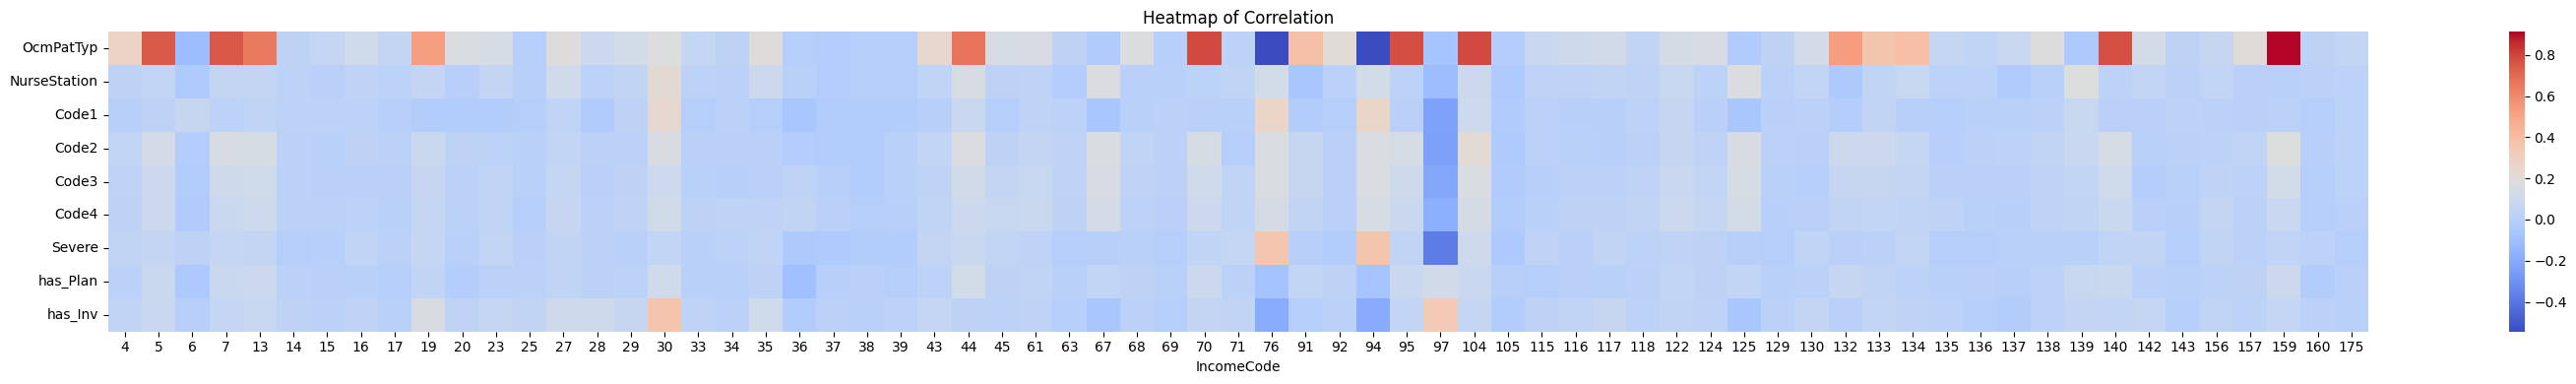

In [96]:
# คอลัมน์ Y คือ IncomeCode ที่เป็นตัวเลข เช่น 6, 92, 104, ...
y_columns = wide_y.columns

correlation_with_y = correlation_matrix.loc[X.columns, y_columns]

plt.figure(figsize=(30, 4))  # ปรับขนาดตามต้องการ
sns.heatmap(correlation_with_y,
            annot=False,        # แสดงตัวเลขในช่อง
            # fmt=".2f",         # จำนวนทศนิยม
            cmap="coolwarm",   # สี (สามารถเปลี่ยนเป็น "viridis", "YlGnBu", "magma", ฯลฯ)
            cbar=True)         # แสดง color bar

plt.title("Heatmap of Correlation")
plt.tight_layout()
plt.show()


# **Multi-label Classification → Predict IncomeCode (binary 0/1 per code)**

In [2]:
import pandas as pd
encoded_df = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/encode.csv')
encoded_df

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,...,Amt,TotalAmt,Code1,Code2,Code3,Code4,Severity,Severe,has_Plan,has_Inv
0,890749,0,0,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,...,"[650.0, 85.0, 100.0]",835.0,0,0,0,0,0,0,1,0
1,890751,0,0,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,...,"[650.0, 85.0, 100.0]",835.0,0,0,0,0,0,0,1,0
2,894455,0,0,วัคซีน ไม่เอาสมุดวัคซีนมา,ป5 รร อนุบาลนครหาดใหญ่ เรียนดี nutrition ดี \r...,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,advice side effect of vaccine,NaN,active \r\nheart no murmur \r\nlung clear\r\na...,[Z25.1] Need for immunization against influenza,...,"[650.0, 85.0, 100.0]",835.0,0,0,0,0,0,0,1,0
3,897083,0,0,นัดรับวัคซีนไข้หวัดใหญ่,มารับวัคซีน ไอเล็กน้อย ไม่มีไข้ \r\n,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,influenza vaccine\r\nyearly,NaN,"General: active, Chest: clear, Heart: normal S...",[Z25.1] Need for immunization against influenza,...,"[650.0, 85.0, 100.0]",835.0,0,0,0,0,0,0,1,0
4,899666,0,0,มารับวัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,นัด 1 ปี,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,...,"[650.0, 85.0, 100.0]",835.0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9898,1146346,0,11,ปวดท้อง ถ่ายเหลว คลื่นไส้,ช่วงเย็น มีอาการปวดท้องถ่ายเหลวเป็นน้ำ 6-7 ครั...,การติดเชื้อที่ลำไส้จากไวรัสและการติดเชื้อที่ลำ...,med,NaN,"good concious\r\nHEENT : not pale , no Jx \r\n...",[A08] Viral and other specified intestinal inf...,...,"[1348.5, 150.0, 500.0, 100.0, 170.0, 100.0, 50...",3168.5,12,102,224,1141,1\nThe patient's,2,1,0
9899,1146347,0,11,ไอ เจ็บคอ,2 วัน ไข้ ไอแห้งๆ ไม่มีน้ำมูก ไม่เหนื่อย เจ็บคอ,คอหอยอักเสบเฉียบพลัน(Acute pharyngitis),med,NaN,"good concious\r\nHEENT : not pale , no Jx , ph...",[J02] Acute pharyngitis,...,"[847.5, 100.0, 100.0, 500.0]",1547.5,4,24,175,320,1\nThe patient's,2,1,0
9900,1146352,0,11,ลื่นล้ม ปวดเข่า2ข้าง มีแผล,15.00 น ลื่นล้มมีแผลถลอกที่ข้อเข่าทั้งสองข้าง ...,การถลอกที่เข่าและขาท่อนปลาย(Abrasion of knee a...,=dressing wound od >> f/U 2/1/68 13.00 น \r\n=...,NaN,Trauma PE\r\nHead / Face: no wound\r\nNeck: no...,[S80.80] Abrasion of knee and leg (TM),...,"[605.0, 330.0, 100.0, 100.0, 500.0]",1635.0,16,50,73,444,"1\nHowever, considering",2,1,0
9901,1146357,0,11,ล้ม ปวดเท้าซ้าย,ลื่นล้ม ข้อเท้าพลิก ปวดเท้าซ้าย เดินลงน้ำหนักไ...,การเคลื่อน แพลง และเคล็ดของข้อและเอ็นที่ระดับข...,- Film: no Fx >> ankle spraing Gr.2\r\n- on sh...,"Ankle / AP, LAT, Mortise (Left): not see fracture",? affected part: Lt ankle\r\n- swelling and te...,"[S93] Dislocation, sprain and strain of joints...",...,"[215.0, 1120.0, 990.0, 475.0, 100.0, 100.0, 50...",3500.0,16,82,127,362,2\nThe patient has,1,1,1


In [11]:
context = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/income_icd10.csv')
context

,Code4,IncomeCode,IncomeCode.1,Amt,count
0,J00,94,1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก,100.00,436
1,J00,76,1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก,100.00,435
2,Z48,94,1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก,100.00,355
3,Z48,76,1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก,100.00,355
4,Z251,92,1.1.14 (1) ค่าบริการชุดเหมาจ่าย,85.00,326
...,...,...,...,...,...
23470,A049,4,1.1.1 (1) ค่ายาผู้ป่วยใน,7166.00,1
23471,Z76,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,1002.36,1
23472,Z760,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,52.80,1
23473,Z833,19,1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์,1690.00,1


In [16]:
context[context['Code4']=='Z014'].sort_values(by='IncomeCode')

,Code4,IncomeCode,IncomeCode.1,Amt,count
22433,Z014,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,3400.0,1
22432,Z014,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,316.0,1
22431,Z014,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,140.0,1
22430,Z014,6,1.1.1 (3) ค่ายาผู้ป่วยนอก,21.0,1
657,Z014,19,1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์,1350.0,9
3985,Z014,19,1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์,270.0,2
22434,Z014,19,1.1.4 (1) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์,2900.0,1
220,Z014,20,1.1.4 (2) ค่าตรวจวินิจฉัยทางเทคนิคการแพทย์ (Ou...,1490.0,23
171,Z014,36,1.1.6 (3) ค่าตรวจภายใน,500.0,26
656,Z014,43,1.1.7 ค่าอุปกรณ์ของใช้และเครื่องมือทางการแพทย์,600.0,9


In [4]:
encoded_df = encoded_df.drop(columns=['Severity'])
encoded_df.to_csv('/content/drive/MyDrive/AIEngineer/price/encode.csv', index=False)

In [3]:
encoded_df.columns

Index(['ID', 'OcmPatTyp', 'NurseStation', 'CC', 'Pi', 'Diag', 'Plan', 'Inv',
       'PEtext', 'ICD10', 'PhyDtrCod', 'docname', 'IncomeCode', 'IncomeCode.1',
       'Amt', 'TotalAmt', 'Code1', 'Code2', 'Code3', 'Code4', 'Severity',
       'Severe', 'has_Plan', 'has_Inv'],
      dtype='object')

In [4]:
X = encoded_df[['OcmPatTyp', 'NurseStation', 'Code1', 'Code2', 'Code3', 'Code4', 'Severe', 'has_Plan', 'has_Inv']]
y = encoded_df[['IncomeCode', 'IncomeCode.1' ,'Amt','TotalAmt']]

In [26]:
import pandas as pd
combined_df = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/predict.csv')
combined_df.head()

,OcmPatTyp,NurseStation,Code1,Code2,Code3,Code4,Severe,has_Plan,has_Inv,4,...,138,139,140,142,143,156,157,159,160,175
0,0,0,0,0,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df = combined_df.copy()

## **Pi**
```
Pi สามารถทำ rewarding โดยใช้ความยาวของ text ได้
```

In [ ]:
print(grouped[grouped['docname']=='พญ. นันทมนต์ วงศ์หิรัญเดชา']['Pi'].iloc[5])

ไอดีขึ้นมาก ไม่มีเสมหะ ลดเค็มลง 
BW ลง 1 kg
มีนัด รพ.หาดใหญ่ 1/68


In [ ]:
print(a['Pi'].iloc[0])

Case 74 YOF
U/D  
@Undifferentiated connective tissue disease (UCTD) DDx late onset SLE  Dx 7/67
-	Presented prolong fever with myalgia (pattern ของ prolong fever แตกต่างจากรอบนี้
ไข้สูงลอย  38-40*C ตลอด) 
-	Septic work up negative all
-	CBC 30/7/67 : WBC 4,600 [N 75 L 16 Mono 2 Bands 5] Hb 7.2 Hct 23% Plt 173,000
-	DAT 1+ 
-	ANA 1:80
-	Antimyositis profile : strongly positive anti-cN-1A anti-Ro52 strongly positive
-	F/U rheumato on prednisolone 30 mg/day, AZA 50 mg/day, HCQ 200 mg/day 
@MDS-RAEB-1 Dx 7/67
-	CBC 30/7/67 : WBC 4,600 [N 75 L 16 Mono 2 Bands 5] Hb 7.2 Hct 23% Plt 173,000
-	BM no malignancy, blast 5% (ผล patho BM biopsy ดังแนบ), EPO level 8 
-	Ferritin 1669 
-	on ESA 40,000 U SC weekly
-	F/U hemato, hct baseline 24-26%
@DM on bioinsulin 30/70 ฉีด 38 units เช้า, Minidiab(5 mg) 1x2 po ac เช้า เย็น
, suganon(5 mg) 1x1 po pc เช้า
-	Last HbA1c 9/67 7.8 mg%
@Hx of proteus mirabilis MDR, E.coli ESBL UTI 8/67
==========================Hospital course ==============================

In [ ]:
result_df.to_csv('/content/drive/MyDrive/AIEngineer/price/severity.csv', index=False)

In [3]:
import pandas as pd
severe = pd.read_csv('/content/drive/MyDrive/AIEngineer/price/severity.csv')
severe = severe.drop(columns='CC_PI_Severity_Code')
severe

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,...,IncomeCode,IncomeCode.1,Amt,TotalAmt,Corrected_ICD10,Code1,Code2,Code3,Code4,Severity
0,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,...,"[6, 92, 104]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0
1,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,...,"[104, 6, 92]",['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[100.0, 650.0, 85.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0
2,894455,O,PED ห้องเด็ก,วัคซีน ไม่เอาสมุดวัคซีนมา,ป5 รร อนุบาลนครหาดใหญ่ เรียนดี nutrition ดี \r...,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,advice side effect of vaccine,NaN,active \r\nheart no murmur \r\nlung clear\r\na...,[Z25.1] Need for immunization against influenza,...,"[92, 6, 104]","['1.1.14 (1) ค่าบริการชุดเหมาจ่าย', '1.1.1 (3)...","[85.0, 650.0, 100.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0
3,897083,O,PED ห้องเด็ก,นัดรับวัคซีนไข้หวัดใหญ่,มารับวัคซีน ไอเล็กน้อย ไม่มีไข้ \r\n,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,influenza vaccine\r\nyearly,NaN,"General: active, Chest: clear, Heart: normal S...",[Z25.1] Need for immunization against influenza,...,"[92, 6, 104]","['1.1.14 (1) ค่าบริการชุดเหมาจ่าย', '1.1.1 (3)...","[85.0, 650.0, 100.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0
4,899666,O,PED ห้องเด็ก,มารับวัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,นัด 1 ปี,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,...,"[104, 6, 92]",['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[100.0, 650.0, 85.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,1146346,O,ER ห้องฉุกเฉิน,ปวดท้อง ถ่ายเหลว คลื่นไส้,ช่วงเย็น มีอาการปวดท้องถ่ายเหลวเป็นน้ำ 6-7 ครั...,การติดเชื้อที่ลำไส้จากไวรัสและการติดเชื้อที่ลำ...,med,NaN,"good concious\r\nHEENT : not pale , no Jx \r\n...",[A08] Viral and other specified intestinal inf...,...,"[76, 139, 94, 6, 92, 7, 13, 104]","['1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก', '2...","[100.0, 300.0, 100.0, 1348.5, 170.0, 150.0, 50...",3168.5,[A08] Viral and other specified intestinal inf...,A,A0,A08,A08,1
9904,1146347,O,ER ห้องฉุกเฉิน,ไอ เจ็บคอ,2 วัน ไข้ ไอแห้งๆ ไม่มีน้ำมูก ไม่เหนื่อย เจ็บคอ,คอหอยอักเสบเฉียบพลัน(Acute pharyngitis),med,NaN,"good concious\r\nHEENT : not pale , no Jx , ph...",[J02] Acute pharyngitis,...,"[104, 76, 94, 6]",['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[500.0, 100.0, 100.0, 847.5]",1547.5,[J02] Acute pharyngitis,J,J0,J02,J02,1
9905,1146352,O,ER ห้องฉุกเฉิน,ลื่นล้ม ปวดเข่า2ข้าง มีแผล,15.00 น ลื่นล้มมีแผลถลอกที่ข้อเข่าทั้งสองข้าง ...,การถลอกที่เข่าและขาท่อนปลาย(Abrasion of knee a...,=dressing wound od >> f/U 2/1/68 13.00 น \r\n=...,NaN,Trauma PE\r\nHead / Face: no wound\r\nNeck: no...,[S80.80] Abrasion of knee and leg (TM),...,"[6, 44, 104, 76, 94]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.7 (1) ค่าอุ...","[605.0, 330.0, 500.0, 100.0, 100.0]",1635.0,[S80.80] Abrasion of knee and leg (TM),S,S8,S80,NaN,1
9906,1146357,O,ER ห้องฉุกเฉิน,ล้ม ปวดเท้าซ้าย,ลื่นล้ม ข้อเท้าพลิก ปวดเท้าซ้าย เดินลงน้ำหนักไ...,การเคลื่อน แพลง และเคล็ดของข้อและเอ็นที่ระดับข...,- Film: no Fx >> ankle spraing Gr.2\r\n- on sh...,"Ankle / AP, LAT, Mortise (Left): not see fracture",? affected part: Lt ankle\r\n- swelling and te...,"[S93] Dislocation, sprain and strain of joints...",...,"[94, 43, 6, 104, 30, 76, 13]","['1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก',...","[100.0, 475.0, 215.0, 500.0, 990.0, 100.0, 112...",3

In [42]:
filtered_df = result_df[result_df['Severity'].isin([0, 1, 2, 3, 4])].copy()
filtered_df['Severity'] = filtered_df['Severity'].astype(int)

# Calculate the correlation between 'TotalAmt' and 'Severity'
correlation = filtered_df['Severity'].corr(filtered_df['TotalAmt'])

print(f"Correlation between Severity and TotalAmt: {correlation}")

# You can also calculate the correlation for each severity level individually
# However, correlation requires variation in both variables within the group.
# If you want to see how TotalAmt varies *by* Severity level, you can use groupby.
severity_amt_stats = filtered_df.groupby('Severity')['TotalAmt'].agg(['count', 'mean', 'std', 'min', 'max'])

print("\nTotalAmt Statistics by Severity Level:")
severity_amt_stats

Correlation between Severity and TotalAmt: 0.24661475204347985

TotalAmt Statistics by Severity Level:


,count,mean,std,min,max
Severity,,,,,
0,1546,2195.066274,2478.233204,28.26,28385.0
1,4529,3156.971365,7006.945464,100.00,224222.5
2,3549,11182.056072,23149.524835,100.00,493472.5
3,269,32895.027361,48257.691695,587.50,469706.0
4,15,175562.266667,387594.501687,2650.00,1550795.0


In [6]:
severe[severe['Code1'].isnull()]

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,...,IncomeCode,IncomeCode.1,Amt,TotalAmt,Corrected_ICD10,Code1,Code2,Code3,Code4,Severity
17,1009139,O,OPD ทั่วไป,DM HT DLP,IOL BE \r\nmild PCO \r\nDM DR screening \r\ndi...,NaN,NaN,NaN,NaN,[9999] Unspecified,...,"[76, 122, 94, 115, 6]","['1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก', '1...","[100.0, 300.0, 100.0, 500.0, 110.0]",1110.0,[9999] Unspecified,NaN,NaN,NaN,NaN,1
34,1042814,O,Neuro Surg ศัลยกรรมระบบประสาทและสมอง,นัดติดตามอาการ,"F/U case ICH , conservative treatment \r\nclin...",NaN,NaN,NaN,GA: good consciousness\r\nN/S E4V5M6 pupil 3 m...,[9999] Unspecified,...,"[6, 104, 76, 94]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.2.1 ค่าตรวจรั...","[2300.0, 500.0, 100.0, 100.0]",3000.0,[9999] Unspecified,NaN,NaN,NaN,NaN,1
201,1102428,O,OPD ทั่วไป,นัดติดตามอาการ,IOL SX PSU 1 week\r\nva 20/30 RE \r\nLE 20/80 ...,NaN,NaN,NaN,NaN,[9999] Unspecified,...,"[76, 94, 115]","['1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก', '1...","[100.0, 100.0, 400.0]",600.0,[9999] Unspecified,NaN,NaN,NaN,NaN,1
278,1112567,O,PED ห้องเด็ก,วัคซีน,มาฉีด IPD4 \r\nไม่ไข้ ไม่ไอ น้ำมูกใส,NaN,NaN,NaN,"Nose: Normal, Chest: Normal, Heart: Normal,",[9999] Unspecified,...,"[104, 92, 6, 94, 76]",['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[300.0, 85.0, 3250.0, 100.0, 100.0]",3835.0,[9999] Unspecified,NaN,NaN,NaN,NaN,0
292,1113656,O,OPD ทั่วไป,นัดติดตามอาการ,"F/U \r\n@ COPD GOLD B, emphysematous lung\r\n@...",NaN,F/U CXR next time\r\nRM,NaN,"Lungs Equal BS, clear\r\nno clubbing",[9999] Unspecified,...,"[104, 76, 94, 6]",['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[500.0, 100.0, 100.0, 2250.0]",2950.0,[9999] Unspecified,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9376,1145042,O,OBS สูตินรีเวช,ร้อนช่องคลอด 1เดือน,ร้อนแสบผ่าเท้า/ขา/ช่องคลอด กินยา,NaN,NaN,NaN,NaN,[9999] Unspecified,...,"[104, 76, 94, 6]",['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[500.0, 100.0, 100.0, 1901.0]",2601.0,[9999] Unspecified,NaN,NaN,NaN,NaN,2
9393,1145073,O,OPD ทั่วไป,ญาติรับยาแทน,ญาติมารับยา,NaN,NaN,NaN,NaN,[9999] Unspecified,...,"[6, 104, 94, 76]","['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.2.1 ค่าตรวจรั...","[720.0, 200.0, 100.0, 100.0]",1120.0,[9999] Unspecified,NaN,NaN,NaN,NaN,0
9456,1145222,O,OBS สูตินรีเวช,ตกขาว3 วัน,3 วันก่อนมารพ.ตกขาวสีเขียว ซื้อยามาเหน็บดีขึ้น...,BV,metro,NaN,PV\r\nMIUB:normal\r\nVg:whitish d/c\r\nCx:os c...,[9999] Unspecified,...,"[94, 6, 104, 36, 76]","['1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก',...","[100.0, 474.0, 300.0, 500.0, 100.0]",1474.0,[N760] Acute vaginitis,NaN,NaN,NaN,NaN,2
9583,1145575,O,SKIN ห้องผิวหนัง,คันตามตัว,1 เดือน มีผื่นคันใหม่ที่ตัว ขาสองข้างใหม่,NaN,NaN,NaN,erythematous papules at trunk and legs,[9999] Unspecified,...,"[104, 6, 94, 76]",['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[400.0, 1088.0, 100.0, 100.0]",1688.0,[9999] Unspecified,NaN,NaN,NaN,NaN,2


In [49]:
df = result_df.dropna(subset=['Code1'])

In [48]:
# แปลง IncomeCode และ Amt ให้เป็นหลายแถวแทนที่จะเป็น list ในแถวเดียว
df_exploded = result_df.explode(['IncomeCode', 'IncomeCode.1', 'Amt'])
df_exploded

,ID,OcmPatTyp,NurseStation,CC,Pi,Diag,Plan,Inv,PEtext,ICD10,...,IncomeCode.1,Amt,TotalAmt,Corrected_ICD10,Code1,Code2,Code3,Code4,CC_PI_Severity_Code,Severity
0,890749,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal, Abdomen: Normal,",[Z25.1] Need for immunization against influenza,...,"['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.14 (1) ค่าบ...","[650.0, 85.0, 100.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0,0
1,890751,O,PED ห้องเด็ก,วัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,Influvac tetra,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,...,['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[100.0, 650.0, 85.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0,0
2,894455,O,PED ห้องเด็ก,วัคซีน ไม่เอาสมุดวัคซีนมา,ป5 รร อนุบาลนครหาดใหญ่ เรียนดี nutrition ดี \r...,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,advice side effect of vaccine,NaN,active \r\nheart no murmur \r\nlung clear\r\na...,[Z25.1] Need for immunization against influenza,...,"['1.1.14 (1) ค่าบริการชุดเหมาจ่าย', '1.1.1 (3)...","[85.0, 650.0, 100.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0,0
3,897083,O,PED ห้องเด็ก,นัดรับวัคซีนไข้หวัดใหญ่,มารับวัคซีน ไอเล็กน้อย ไม่มีไข้ \r\n,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,influenza vaccine\r\nyearly,NaN,"General: active, Chest: clear, Heart: normal S...",[Z25.1] Need for immunization against influenza,...,"['1.1.14 (1) ค่าบริการชุดเหมาจ่าย', '1.1.1 (3)...","[85.0, 650.0, 100.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0,0
4,899666,O,PED ห้องเด็ก,มารับวัคซีน,แข็งแรงดี,ต้องการก่อภูมิคุ้มกันต่อโรคไข้หวัดใหญ่(Need fo...,นัด 1 ปี,NaN,"Chest: Normal, Heart: Normal,",[Z25.1] Need for immunization against influenza,...,['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[100.0, 650.0, 85.0]",835.0,[Z25.1] Need for immunization against influenza,Z,Z2,Z25,Z251,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,1146346,O,ER ห้องฉุกเฉิน,ปวดท้อง ถ่ายเหลว คลื่นไส้,ช่วงเย็น มีอาการปวดท้องถ่ายเหลวเป็นน้ำ 6-7 ครั...,การติดเชื้อที่ลำไส้จากไวรัสและการติดเชื้อที่ลำ...,med,NaN,"good concious\r\nHEENT : not pale , no Jx \r\n...",[A08] Viral and other specified intestinal inf...,...,"['1.1.12 (6) ค่าบริการการพยาบาลผู้ป่วยนอก', '2...","[100.0, 300.0, 100.0, 1348.5, 170.0, 150.0, 50...",3168.5,[A08] Viral and other specified intestinal inf...,A,A0,A08,A08,1\nThe patient's,1
9904,1146347,O,ER ห้องฉุกเฉิน,ไอ เจ็บคอ,2 วัน ไข้ ไอแห้งๆ ไม่มีน้ำมูก ไม่เหนื่อย เจ็บคอ,คอหอยอักเสบเฉียบพลัน(Acute pharyngitis),med,NaN,"good concious\r\nHEENT : not pale , no Jx , ph...",[J02] Acute pharyngitis,...,['1.2.1 ค่าตรวจรักษาทั่วไปของผู้ประกอบวิชาชีพ'...,"[500.0, 100.0, 100.0, 847.5]",1547.5,[J02] Acute pharyngitis,J,J0,J02,J02,1\nThe patient's,1
9905,1146352,O,ER ห้องฉุกเฉิน,ลื่นล้ม ปวดเข่า2ข้าง มีแผล,15.00 น ลื่นล้มมีแผลถลอกที่ข้อเข่าทั้งสองข้าง ...,การถลอกที่เข่าและขาท่อนปลาย(Abrasion of knee a...,=dressing wound od >> f/U 2/1/68 13.00 น \r\n=...,NaN,Trauma PE\r\nHead / Face: no wound\r\nNeck: no...,[S80.80] Abrasion of knee and leg (TM),...,"['1.1.1 (3) ค่ายาผู้ป่วยนอก', '1.1.7 (1) ค่าอุ...","[605.0, 330.0, 500.0, 100.0, 100.0]",1635.0,[S80.80] Abrasion of knee and leg (TM),S,S8,S80,NaN,"1\nHowever, it",1
9906,1146357,O,ER ห้องฉุกเฉิน,ล้ม ปวดเท้าซ้าย,ลื่นล้ม ข้อเท้าพลิก ปวดเท้าซ้าย เดินลงน้ำหนักไ...,การเคลื่อน แพลง และเคล็ดของข้อและเอ็นที่ระดับข...,- Film: no Fx >> ankle spraing Gr.2\r\n- on sh...,"Ankle / AP, LAT, Mortise (Left): not see fracture",? affected part: Lt ankle\r\n- swelling and te...,"[S93] Dislocation, sprain and strain of joints...",...,"['1.1.14 (2.1) ค่าบริการโรงพยาบาล ผู้ป่วยนอก',...","[100.0, 475.0, 215.0, 500.0, 990.0, 100.0, 112...",3500.0,"[S93] Dislocation, sprain and strain of joints...",S,S9,S93,S93,2\nThe patient has,2
